# Class 9: Inferential statistics

This class notebook is designed to let you practice some simple statistical tests. The datasets are small and uncomplicated compared to the project datasets. This is so that you can practice without the additional burden of cleaning and manipulating large, messy datasets. 

There are three parts to this notebook:
1. A pearson correlation test of the association between wolf inbreeding coefficients and number of pups. The analysis is very similar to what was covered in the lecture.
2. A pearson correlation test of the association between malaria parasite density and white blood cell counts in infected children. The analysis is complicated by the fact that parasite density has a non-normal distribution, and therefore a transformation on the data is first required before performing the statistical test.
3. A two-sample *t*-test on the mean difference of ladybird sizes in sites with different predation pressures. This is a refresher of your analysis in Year 1 in preparation for a different way of analysing this data on Friday. 

Everything you need to complete this notebook is covered in this notebook, in [today's lecture](lecture_9.ipynb) and the accompanying notebook [gannet_arrivals.ipynb](gannet_arrivals.ipynb).

## Imports

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, ttest_1samp, ttest_ind, shapiro

warnings.filterwarnings("ignore")

## Part 1. Does wolf inbreeding reduce pup survival?

<a href="https://commons.m.wikimedia.org/wiki/File:La_bellezza_dei_lupi_Parco_Nazionale_d%27Abruzzo_l%27Aquila_Italy_13.png">
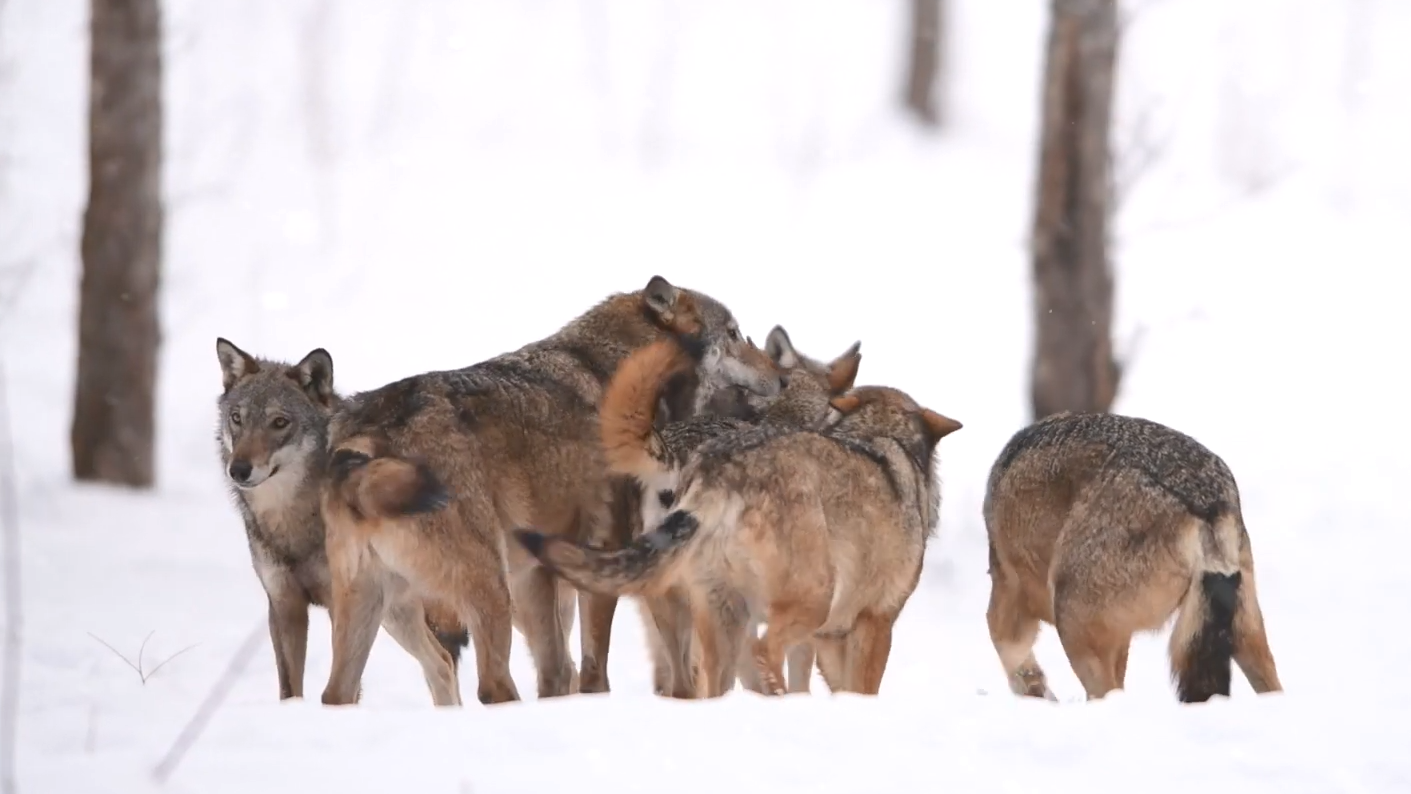
</a>


By 1970 there were no wolves in Norway. In 1980 two wolves immigrated into Norway and founded a new population. The population grew to about 100 wolves by 2002. Inbreeding is high in populations founded by so few individuals. Over ten years, Liberg et al (2005) measured the inbreeding coefficient of mated pairs and the number of their pups which survived. Higher inbreeding coefficients of mated pairs mean they are highly related (e.g., brother-sister). 

The data collected by the researchers are in the file `../Datasets/wolves.csv`. Each row is a mated pair. The first column is their inbreeding coefficient and the second is their number of surviving pups.

The researchers hypothesised that reduced pup survivability is associated with inbreeding. Let's test this hypothesis by calculating a correlation coefficient between inbreeding coefficient and number of surviving pups.

<div class="alert alert-success">

You may find it helpful to use the code in [gannet_arrivals.ipynb](gannet_arrivals.ipynb) as a basis to answer this question.
</div>

- Read in the dataset and print it out to see what it looks like.

- Use an appropriate graph to visually examine the association between inbreeding coefficient and number of pups. 

- State the biological, null and alternative hypotheses. 

> Write your hypotheses here

- Perform a pearson correlation test and output the correlation coefficient and *p*-value.

- Calculate and print the 95% confidence interval of the population correlation coefficient.

- Report the outcome of the test as you would in a scientific report, paper or poster. This means reporting
1. in words, what you conclude about the association between inbreeding coefficient and number of pups,
2. the sample size,
3. the estimate of the population correlation coefficient with the 95% CI,
4. the *p*-value.

- All to the appropriate number of decimal places.

> Write your conclusion here.

## Part 2. Is white blood cell count associated with parasitaemia in malaria infections?

<a href="https://pixnio.com/science/microscopy-images/malaria-plasmodium/two-species-of-malarial-parasites-p-vivax-and-p-ovale-can-cause-relapsing-illness-in-humans">
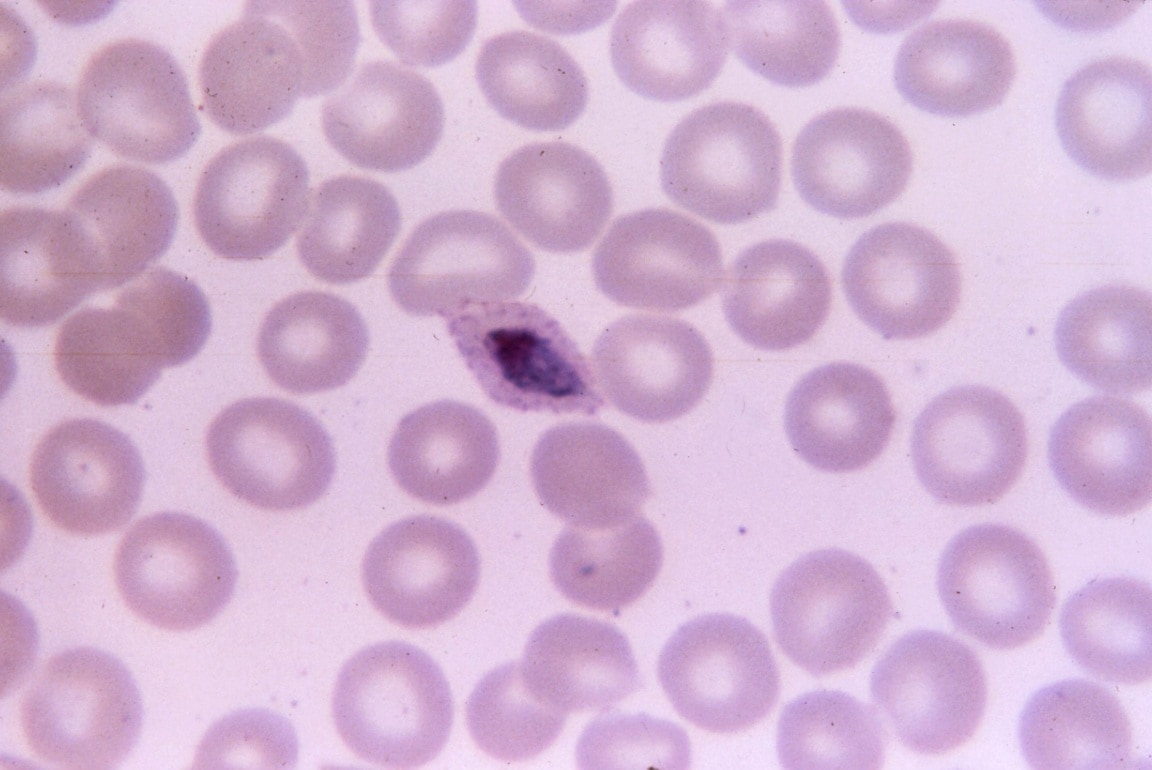
</a>

Part of the malaria parasite's lifecycle in the mammalian host is spent in red blood cells. Researchers wanted to see if there was a relationship between malaria parasitaemia and white blood cell counts in the blood of infected children. 

The data collected by the researchers are in the file `../Datasets/malaria.csv`. Each row is an individual child. The first column is their white blood cell counts per microlitre, and the second is their parasitaemia (number of infected red blood cells per microlitre).

The researchers hypothesised that white blood cell counts would be lower in children with higher parasitaemia. This is because white blood cells migrate from the blood stream to the spleen to fight the infection. 

Let's test this hypothesis by calculating a correlation coefficient between white blood cell counts and parasitaemia.

- Read in the dataset and print it out to see what it looks like.

You should notice two things about the data. First, that white blood cell counts vary between about six to ten thousand cells/microlitre. And second, that parasitaemia is highly variable, ranging from two parasites per microlitre to over eighty million.

- Use an appropriate graph to visually examine the association between white blood cell count and parasitaemia. 

Can you tell from this graph if there is a relationship between white blood cell counts and parasitaemia? 

The answer is no. The data point with over eighty million parasites/microlitre causes all the other data points (which have much smaller parasitaemias) to be squashed up against the *x*- or *y*-axis (depending on which variable you plotted on which axis).

Let's see what happens when we calculate the correlation coefficient using this data.

- Perform a pearson correlation test and output the correlation coefficient and *p*-value.

You should find a non-significant correlation coefficient of *r* = -0.26 with a *p*-value of 0.27.

However, you have just made a very common mistake. The result you have just calculated is meaningless! Numbers can give you a false sense of certainty. But numbers, like words, if not used correctly can be gibberish. 

Many statistical tests, including the pearson correlation test, only give meaningful results when data are normally distributed, or nearly so. When data are not normally distributed, these tests give meaningless results.

Remember, normally distributed data has a bell-shape - symmetrical around a central peak with fewer and fewer data points as we move away from the peak, as shown in this graph:

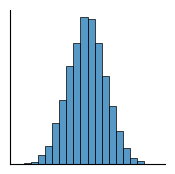

Are the white blood cell and parasitaemia data normally distributed? A glance at the dataframe and the scatter plot above should ring alarm bells. A good way to check if data are normally distributed is to look at their histograms.

- Plot a histogram of white blood cell counts. Do the data look normally distributed?

Remember you can make a histogram with the command
```python
sns.displot( df['variable name'] )
```

The histogram of white blood cell counts has a peak but it doesn't look symmetrical. But with only twenty data points making up the histogram we shouldn't read too much into this asymmetry.

There is a statistical test for examining if a variable is normally distributed or not. It is called the Shapiro-Wilks test. It tests the null hypothesis that a sample comes from a normally distributed population. The Shapiro-Wilks test-statistic is usually denoted *W*. In python the command is 

```python
Wtest = shapiro( df['variable'] )
```

If the *p*-value is below 5% then there is sufficient evidence to reject the null hypothesis. We conclude that the data are not normally distributed.

If the *p*-value is above 5% then there is insufficient evidence to reject the null hypothesis. We conclude that the data are normally distributed.

- Perform a Shapiro-Wilks test on white blood cell counts.

With a *p*-value greater than 0.05, you should conclude that white blood cell counts are normally distributed.

- Plot a histogram of parasitaemia. Do the data look normally distributed?

The histogram of parasitaemia looks nothing like a normal distribution. The data vary over such a huge range that seaborn struggles to represent it clearly in a graph. Parasitaemia is almost certainly not normally distributed.

- Perform a Shapiro-Wilks test on parasitaemia.

You should conclude that parasitaemia is not normally distributed.

What can we do?

When data is not normally distributed we can transform it to try and make it normally distributed. When data varies over several orders of magnitude, such as parasitaemia, then log-transforming is usually a good first choice.

Log-transforming brings large values closer to the small values. The table below shows that when numbers that vary over many orders of magnitude (from 1 to 1,000) are logged they are transformed onto a linear scale (from 0 to 3).

x | log<sub>10</sub>(x)
:--- | :---:
1 | 0
10 | 1
100 | 2
1000 | 3

Let's add another column to our dataframe that is the log-transform of parasitaemia. We use the numpy function `np.log10` like so:

```python
df['log-variable'] = np.log10( df['variable'] )
```

- Add the log-transform of parasitaemia to your dataframe. 

- Plot a histogram of the log-transformed parasitaemia. Does log-parasitaemia look normally distributed?

The histogram should look more like a normal distribution.

- Perform a Shapiro-Wilks test on log-parasitaemia.

If everything has worked you should obtain a *p*-value of 0.96 for the Shapiro-Wilks test for normality. As *p* is above 5% then there is insufficient evidence to reject the null hypothesis. We conclude that log-parasitaemia is normally distributed.

In conclusion white blood cells counts and log-parasitaemia are both normally distributed.

- Use an appropriate graph to visually examine the association between white blood cell count and log-parasitaemia. 

It should be clear from the plot that there is a strong correlation between white blood cell count and log-parasitaemia.

- Finally perform a pearson correlation test on white blood cell count and log-parasitaemia.

Now you should get correlation coefficient of -0.79 - a strong negative correlation - and a *p* < 5%, in contrast to the previous result.

- Calculate the 95%CI.


- Report the outcome of the test as you would in a scientific report, paper or poster. This means reporting
1. in words, what you conclude about the association between white blood cell count and log-parasitaemia,
2. the sample size,
3. the estimate of the population correlation coefficient with the 95% CI,
4. the *p*-value.

- All to the appropriate number of decimal places.

<div class="alert alert-success">

Note that when the *p*-value is less than 0.001, it is convention to write "*p* < 0.001", rather than give the exact *p*-value. 
</div>


> Write your conclusion here.

## Part 3. Do two-spot ladybird sizes vary between sites with different levels of predation?

<div>
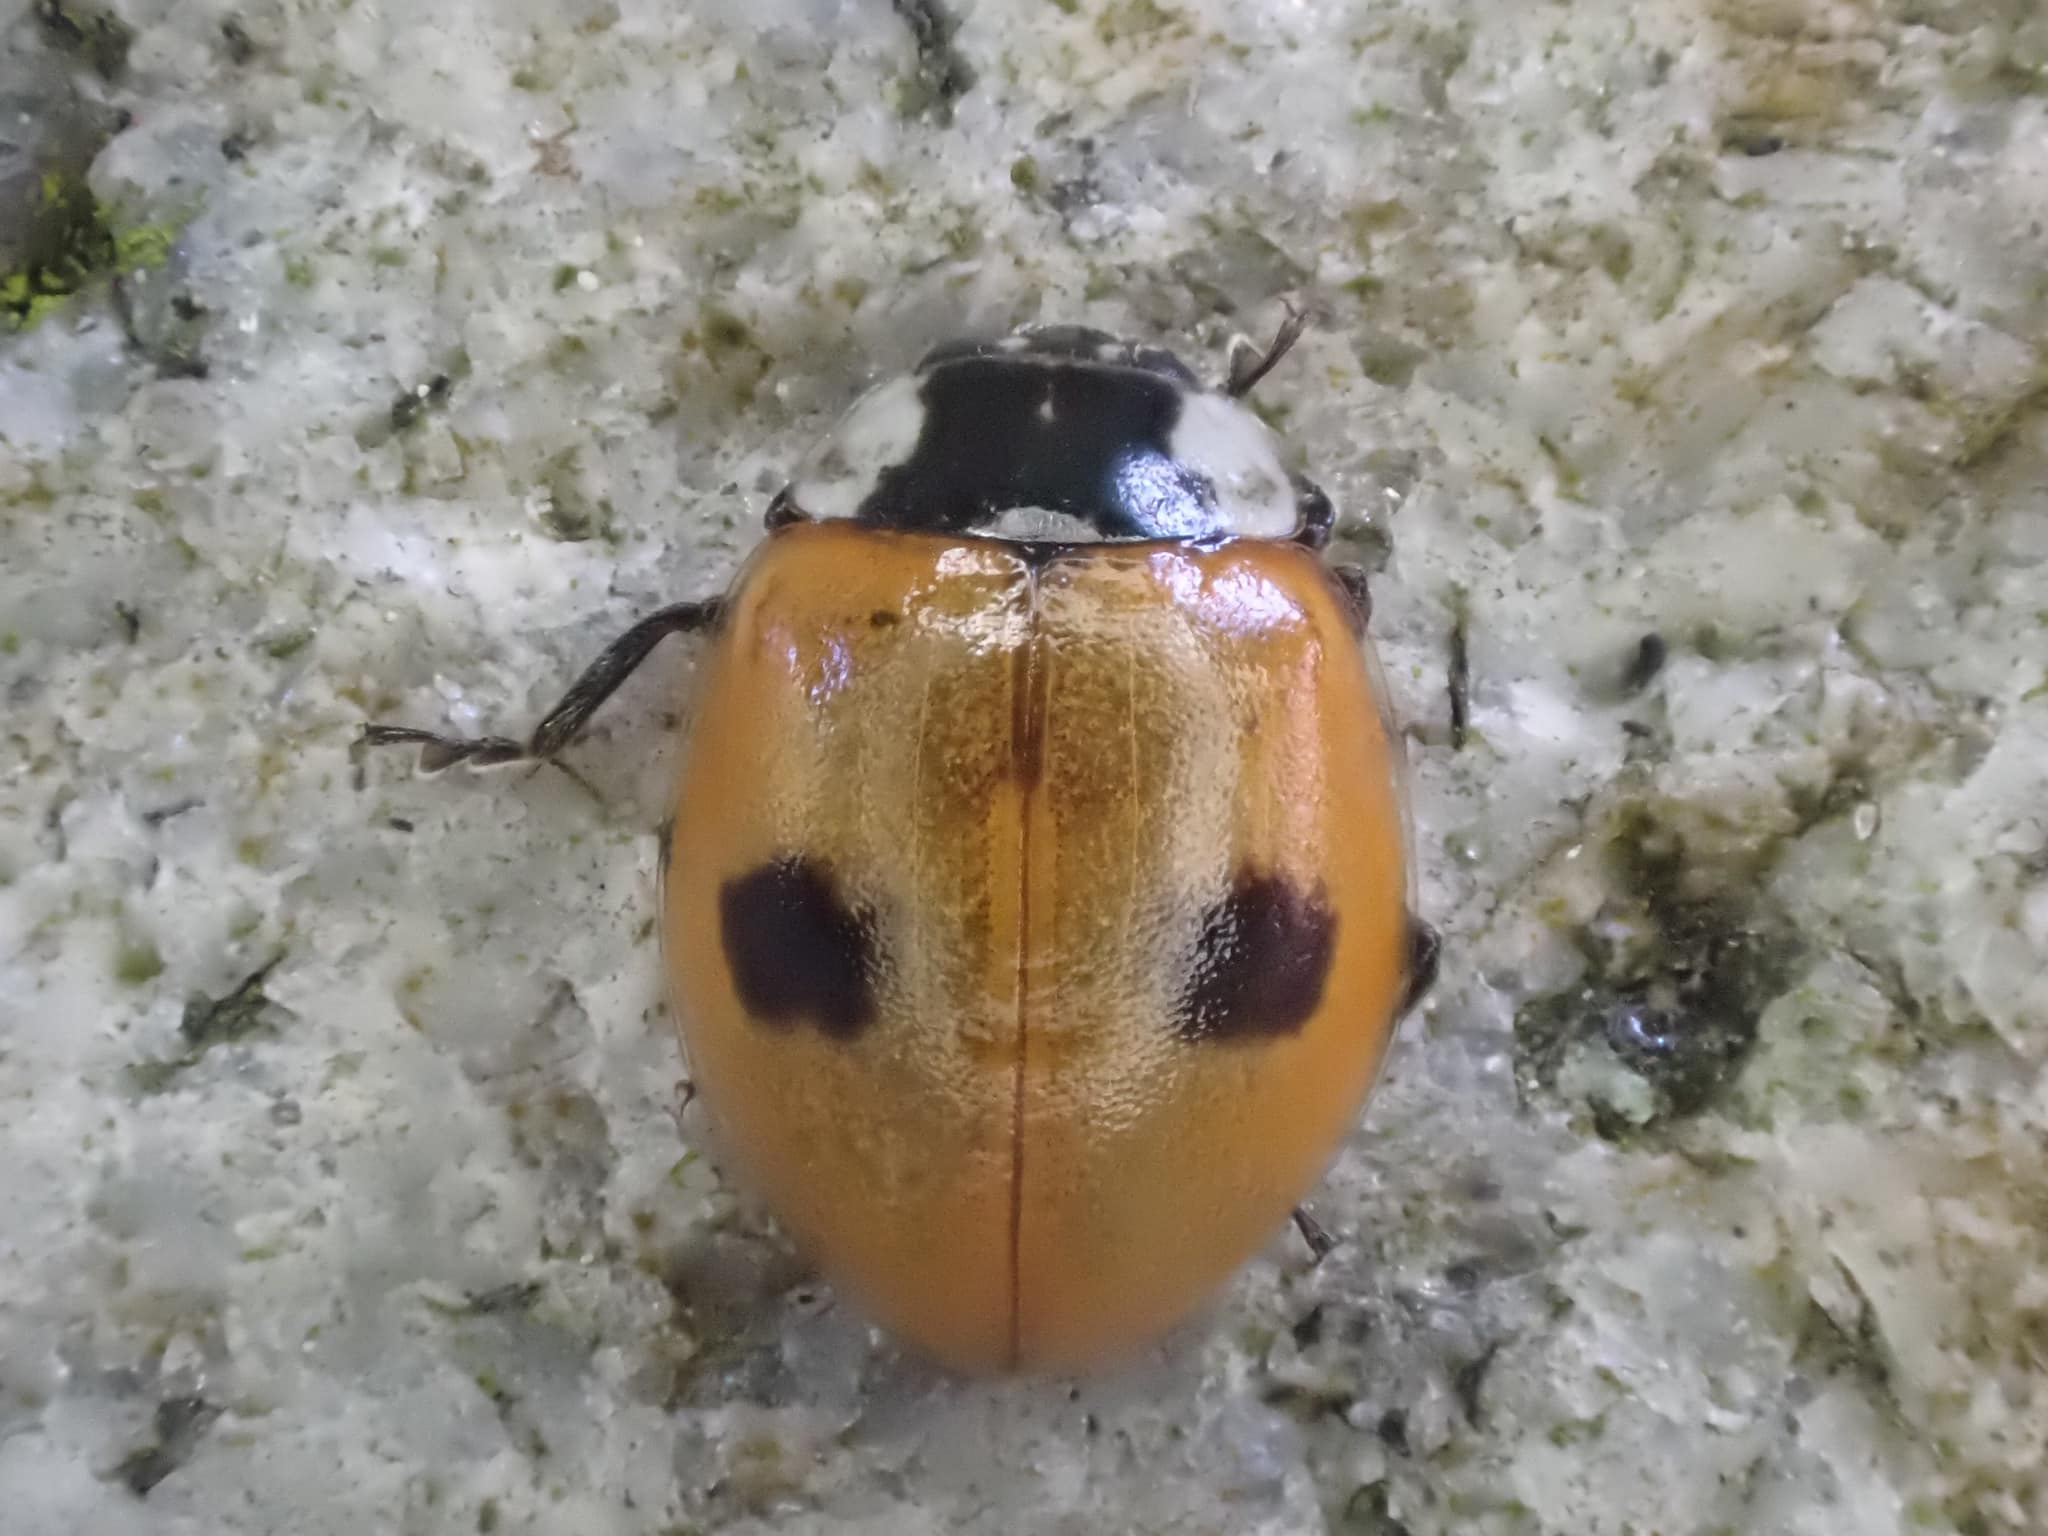
</div>

Remember last year you visited an Edinburgh cemetery to measure the sizes of two-spot ladybirds. 

Two-spot ladybirds are predated upon by Harlequin ladybirds. And Harlequin ladybirds prefer to eat smaller two-spots. So we might expect that in cemeteries where Harlequins are numerous, mean two spot ladybird sizes will be higher than in cemeteries where Harlequins are less numerous. 

So last year you measured two-spot ladybird sizes in one cemetery and another group measured sizes in a different cemetery with a different level of predation. You then compared your sizes with theirs to test if there was a difference in two-spot sizes between the two cemeteries.

Today we will repeat the analysis using two of last year's groups' data. The analysis is pretty much the same as last year except that the data are in tidy-form (one ladybird per row and all sizes in a single column). On Friday you will learn another way of analysing this data using linear models.

The data collected by a pair of last year's groups are in the file `../Datasets/ladybirds.csv`. Each row is a ladybird. The first column is their level of predation at their cemetery: either "low" or "high". The second is their size to the nearest quarter of a millimetre.

- Read in the dataset and print it out to see what it looks like.

- Use an appropriate graph to visually compare ladybird sizes in the two cemeteries. 

You can probably tell from your plot that there is barely any difference in the mean sizes of the two ladybird samples. But let's formally test the null hypothesis of no difference in population means so that you can see how it is done. 

To test if population mean ladybird sizes differ between predation sites, we need to subset the dataframe into a low predation group and a high predation group. There are two ways of doing this. For example, to subset the low predation group you could do

```python
low_group = ladybirds[ ladybirds['predation'] == 'low' ]
```

or 

```python
low_group = ladybirds.query( 'predation == "low"' )
```

assuming you have called your dataframe `ladybirds`.

- Create "low" and "high" predation groups. Print them out to make sure you have done this correctly.

- Using the two groups you've just created, calculate the mean ladybird size of each group (use `.mean()`)
- And calculate the difference in the mean sizes between the groups.

You should get a difference in mean sizes of 0.071 mm.

The test statistic used to compare the means of two populations is called *t*. And the statistical test to compare two population means is called a **two-sample *t*-test**. 

- State the biological, null and alternative hypotheses. 

> Write your hypotheses here

The python function to perform a two-sample *t*-test is

```python
result = ttest_ind( sample1, sample2 )
```

where `sample1` and `sample2` are replaced with the two samples to be compared, i.e., the low and high predation groups.

- Perform a two-sample *t*-test and output the *t*-statistic and the *p*-value.

- Calculate and print the 95% confidence interval of the difference in population means.

- Report the outcome of the test as you would in a scientific report, paper or poster. This means reporting
1. in words, what you conclude about the difference in mean ladybird sizes in the different predation sites,
2. the samples' sizes,
3. the estimate of the difference in population means with the 95% CI,
4. the value of the *t* test-statistic and the *p*-value.

- All to the appropriate number of decimal places.

> Write your conclusion here.